# Polarization
Following [Detlefs[2012]](http://dx.doi.org/10.1140/epjst/e2012-01630-3) the electric field of a monochromatic plane wave can be described as

$$
\begin{equation}
\begin{split}
\vec{E}(t,\vec{x}) =& \Re[(V_0\hat{e}_0 + V_1\hat{e}_1)e^{i(\vec{k}\cdot\vec{x} - \omega t)}]\\
\hat{e}_0 =& \hat{e}_1\times\hat{e}_2\\
\hat{e}_1 =& \hat{e}_2\times\hat{e}_0\\
\hat{e}_2 =&\hat{k}
\end{split}
\end{equation}    
$$

The complex random vector $\vec{V}=[V_0,V_1]^T$ is known as the Jones vector. The state of polarization of this field refers to its second order statistics, which can be expressed as the expectation of the outer product of the Jones vector with itself ($x^*$ denotes the complex conjugate of $x$ and $\langle x\rangle$ the expectation)

$$
\begin{equation}
C = \langle\vec{V}\otimes\vec{V}\rangle=
\begin{bmatrix} \langle V_0 V_0^*\rangle & \langle V_0 V_1^*\rangle\\
\langle V_1 V_0^*\rangle & \langle V_1 V_1^*\rangle
\end{bmatrix}
\end{equation}    
$$

Under Stokes' formalism the coherency matrix $C$ is decomposed as follows

$$
\begin{equation}
C = \frac{1}{2}\begin{bmatrix} S_0+S_1 & S_2-iS_3\\
S_2+iS_3 & S_0-S_1
\end{bmatrix}
\end{equation}    
$$

The Poynting vector can be written as function of the Jones vector:

$$
\begin{equation}
\begin{split}
\vec{P}(t,\vec{x})=& \frac{1}{\mu_0}\vec{E}(t,\vec{x})\times\vec{B}(t,\vec{x})\\
=& \frac{1}{c\mu_0}\left(\vec{E}(t,\vec{x})\cdot\vec{E}(t,\vec{x})\right)\hat{k}\\
=& \frac{c\epsilon_0}{2}\left( \Re[\vec{V}\cdot\vec{V}^*] + \Re[\vec{V}\cdot\vec{V}e^{2i(\vec{k}\cdot\vec{x} - \omega t)} ]  \right)\hat{k}\\
\Re[\vec{V}\cdot\vec{V}^*]=&\vec{V}\cdot\vec{V}^*=\left\lvert V_0\right\rvert^2 +\left\lvert V_1\right\rvert^2\\
\Re[\vec{V}\cdot\vec{V}e^{2i(\vec{k}\cdot\vec{x} - \omega t)}]=&
\left\lvert V_0\right\rvert^2 \cos(2(\phi_0+\alpha))
+\left\lvert V_1\right\rvert^2 \cos(2(\phi_1+\alpha))\\
\alpha=&\vec{k}\cdot\vec{x} - \omega t\\
\end{split}
\end{equation}
$$

where we used $\cos 2x = 2\cos^2 x -1$ and SI units $V/m$ for $\left\lvert V_j\right\rvert$.

For an isolated wave $\vec{V}\in\mathbb{C}^2$, the intensity (SI units: $W/m^2$) can be obtained by time averaging the Poynting vector (second term vanishes):

$$
\begin{equation}
\begin{split}
I(\vec{x})=&{\left\langle \left\lVert \vec{P}(t,\vec{x}) \right\rVert \right\rangle}_{t}\\
=&\frac{c\epsilon_0}{2}\vec{V}\cdot\vec{V}^*\quad\quad {\langle \cos(2(\phi_j+\alpha)) \rangle}_{t}=0\\
=&\frac{c\epsilon_0}{2}\mathrm{Tr}(C)\\
=&\frac{c\epsilon_0}{2}S_0
\end{split}
\end{equation}
$$

For an ensemble of waves (with the same angular frequency $\omega$) the Jones vector is a random vector and the intensity is the expectation value of the Poynting vector norm instead of the time average

$$
\begin{equation}
\begin{split}
I(\vec{x})=&{\left\langle \left\lVert \vec{P}(t,\vec{x}) \right\rVert \right\rangle}\\
=&\frac{c\epsilon_0}{2}\langle\vec{V}\cdot\vec{V}^*\rangle\quad\quad \langle \left\lvert V_j\right\rvert^2\cos(2(\phi_j+\alpha))\rangle = 0\\
=&\frac{c\epsilon_0}{2}\mathrm{Tr}(C)\\
=&\frac{c\epsilon_0}{2}S_0
\end{split}
\end{equation}
$$

where we assume that $\left\lvert V_j\right\rvert$ and $\phi_j$ are independent random variables and $\phi_j$ uniform, in which case the ensemble average is independent of time.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from spectrocrunch.sources import polarization

## Fully polarized
Plot the electric field vector in a plane perpendicular to the propagation direction:

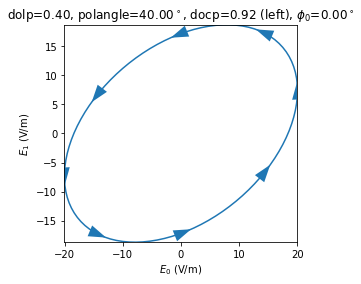

In [2]:
# Define incident intensity and polarization
intensity = 1 # W/m^2
dolp = 0.4 # degree of linear polarization (in [0,1])
polangle = 40 # angle of semi-major axis with respect to the horizontal direction (in [-90,90])
handedness = "left"
phase0 = 0 # phase of V0 in degrees

# Describe with Jones' formalism because fully polarized
J1 = polarization.Jones.from_params(intensity=intensity,dolp=dolp,polangle=polangle,\
                                    handedness=handedness,phase0=phase0)

# We're looking upstream:
J1.plot_efield()

plt.show()

## Partially polarized
Plot the electric field vector in a plane perpendicular to the propagation direction:

Intensity: 0.9 (pol, W/m²), 0.1 (unpol, W/m²)


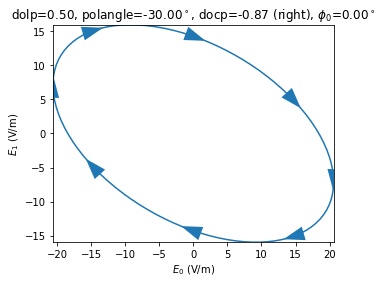

In [3]:
# Define incident intensity and polarization
intensity = 1 # W/m^2
dop = 0.9 # degree of polarization (in [0,1])
dolp = 0.5*dop # degree of linear polarization (in [0,dop])
polangle = -30 # angle of polarization ellipse with respect to the horizontal direction (in [-90,90])
handedness = "right"

# Describe with Stokes' formalism because not fully polarized
S1 = polarization.Stokes.from_params(intensity=intensity,dop=dop,dolp=dolp,\
                                    polangle=polangle,handedness=handedness)

# Plot the polarized component:
print("Intensity: {} (pol, W/m²), {} (unpol, W/m²)".format(S1.intensity_polarized,S1.intensity_unpolarized))
S1.decompose()["pol"].plot_efield()
plt.show()

## Thomson scattering

The scattering direction defined by the wave vector $\vec{k}_\mathrm{sc}$ in the coordinate system of the primary beam $\vec{k}$:

$$
\begin{equation}
\begin{split}
\hat{k}_\mathrm{sc}\cdot\hat{e}_0 =& \cos\phi\sin\theta\\
\hat{k}_\mathrm{sc}\cdot\hat{e}_1 =& \sin\phi\sin\theta\\
\hat{k}_\mathrm{sc}\cdot\hat{e}_2 =& \cos\theta\\
\end{split}
\end{equation}
$$

If we define the reference frame of the scattered beam as
$$
\begin{equation}
\begin{split}
\hat{e}_2^\prime =& \hat{k}_\mathrm{sc}\\
(\hat{k}_\mathrm{sc}\times\hat{k})\cdot\hat{e}_0^\prime=1\\
\hat{e}_1^\prime =&\hat{e}_2^\prime\times\hat{e}_0^\prime
\end{split}
\end{equation}
$$

which means that $\hat{e}_0^\prime$ is prependicular to the scattering plane defined by $\hat{k}_\mathrm{sc}$ and $\hat{k}$, then the Stokes parameters after Thomson scattering can be expressed in this reference frame as

$$
\begin{equation}
\begin{split}
S_{sc}=&M\cdot S\\
M =& \begin{bmatrix}
a&(1-a)\cos2\beta&-(1-a)\sin2\beta&0\\
(1-a)&a\cos2\beta&-a\sin2\beta&0\\
0&\cos\theta\sin2\beta&\cos\theta\cos2\beta&0\\
0&0&0&\cos\theta
\end{bmatrix}\\
\beta=&\frac{\pi}{2}-\phi=\arccos(\hat{e}_0\cdot\hat{e}_0^\prime)\\
a=&\frac{1+\cos^2\theta}{2}
\end{split}
\end{equation}
$$

The scattered intensity can be written as

$$
\begin{equation}
\begin{split}
I_{sc}=&I_0K(\phi,\theta)\\
K(\phi,\theta)=&a-(1-a)\left(\frac{S_1}{S_0}\cos2\phi+\frac{S_2}{S_0}\sin2\phi\right)
\end{split}
\end{equation}
$$

Two common examples are $S_1=S_2=S_3=0$ (unpolarized) and $S_1=S_0$, $S_2=S_3=0$ (linear polarized in the horizontal direction)

$$
\begin{equation}
\begin{split}
K_{un}=&\frac{1+\cos^2\theta}{2}\\
K_{linh}=&1-\sin^2\theta\cos^2\phi
\end{split}
\end{equation}
$$

Incident (Jones):
intensity = 1.0 (W/m^2)
dolp = 0.8
polangle = 1.31563299348e-15 (deg)
handedness = left
phase0 = 0.0 (deg)

Scattered (Jones:
intensity = 0.217898694101 (W/m^2)
dolp = 0.87827657506
polangle = 13.9068076886 (deg)
handedness = left
phase0 = -42.4842565082 (deg)


Incident (Stokes):
intensity = 1.0 (W/m^2)
dop = 0.4
dolp = 0.32
polangle = 0.0 (deg)
handedness = left

Scattered (Stokes):
intensity = 0.396205584523 (W/m^2)
dop = 0.915776411938
dolp = 0.909715445795
polangle = 2.84359386365 (deg)
handedness = left

Incident beam (polarized component):


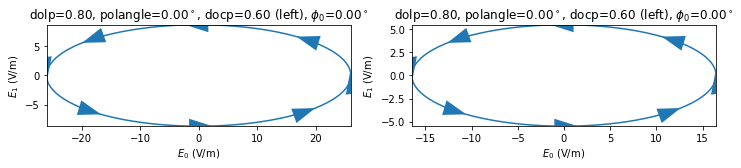

Scattered beam (polarized component in scattered reference frame):


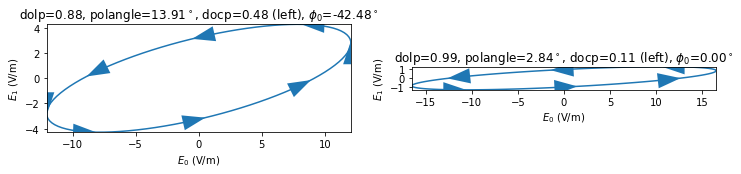

In [4]:
# Define incident intensity and polarization
intensity = 1 # W/m^2
dop = 0.4 # degree of polarization (in [0,1])
dolp = 0.8*dop # degree of linear polarization (in [0,dop])
polangle = 0 # angle of polarization ellipse with respect to the horizontal direction (in [-90,90])
handedness = "left"

# Fully polarized
J1 = polarization.Jones.from_params(intensity=intensity,dolp=dolp/dop,\
                                    polangle=polangle,handedness=handedness)

# Partially polarized
S1 = polarization.Stokes.from_params(intensity=intensity,dop=dop,dolp=dolp,\
                                    polangle=polangle,handedness=handedness)

# Scattering direction: spherical coordinates
azimuth = 20
polar = 80 # scattering angle

J2 = J1.thomson_scattering(azimuth,polar)
S2 = S1.thomson_scattering(azimuth,polar)

print("Incident (Jones):")
print J1
print("\nScattered (Jones:")
print J2

print("\n\nIncident (Stokes):")
print S1
print("\nScattered (Stokes):")
print S2

# We're looking upstream:
fig,axs = plt.subplots(1,2,figsize=(12,8))

print("\nIncident beam (polarized component):")
plt.sca(axs[0])
J1.plot_efield()
if S1.dop==0:
    axs[1].set_aspect('equal')
    axs[1].axis('off')
else:
    plt.sca(axs[1])
    S1.decompose()["pol"].plot_efield()
plt.show()

fig,axs = plt.subplots(1,2,figsize=(12,8))

print("Scattered beam (polarized component in scattered reference frame):")
plt.sca(axs[0])
J2.plot_efield()
if S2.dop==0:
    axs[1].set_aspect('equal')
    axs[1].axis('off')
else:
    plt.sca(axs[1])
    S2.decompose()["pol"].plot_efield()

plt.show()


Incident beam (polarized component):


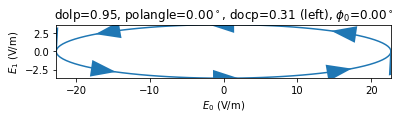

Incident intensity: 1.0 W/m²
Scattered intensity (phi=0deg,theta=90deg) = 0.1675 W/m²
Scattered intensity (phi=90deg,theta=90deg) = 0.8325 W/m²


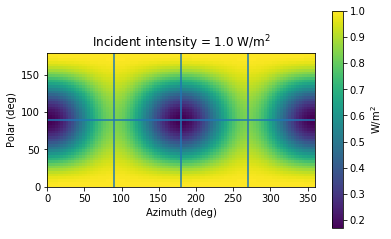

In [5]:
# Define incident intensity and polarization
intensity = 1 # W/m^2
dop = 0.7 # degree of polarization (in [0,1])
dolp = 0.95*dop # degree of linear polarization (in [0,dop])
polangle = 0 # angle of polarization ellipse with respect to the horizontal direction (in [-90,90])
handedness = "left"

S1 = polarization.Stokes.from_params(intensity=intensity,dop=dop,dolp=dolp,\
                                    polangle=polangle,handedness=handedness)

if S1.dop!=0:
    print("\nIncident beam (polarized component):")
    S1.decompose()["pol"].plot_efield()
    plt.show()
    
azimuth = np.linspace(0,360,100)
polar = np.linspace(0,180,50)
extent = [azimuth[0],azimuth[-1],polar[0],polar[-1]]
azimuth,polar = np.meshgrid(azimuth,polar)

print("Incident intensity: {} W/m²".format(S1.intensity))
print("Scattered intensity (phi=0deg,theta=90deg) = {} W/m²".format(S1.thomson_intensity(0,90)))
print("Scattered intensity (phi=90deg,theta=90deg) = {} W/m²".format(S1.thomson_intensity(90,90)))

img = S1.thomson_intensity(azimuth,polar)
plt.imshow(img,origin="lower",extent=extent)
plt.axhline(y=90)
for x in [90,180,270]:
    plt.axvline(x=x)
plt.xlabel("Azimuth (deg)")
plt.ylabel("Polar (deg)")
plt.title("Incident intensity = {} W/m$^2$".format(S1.intensity))
plt.colorbar(label="W/m$^2$")
plt.show()

### Thomson cross-section

The Thomson cross-section (elastic cross-section for a free electron) can be written as

$$
\begin{equation}
\begin{split}
\frac{d\sigma_T}{d\Omega} =& r_e^2\frac{I_{sc}(\phi,\theta)}{I_0}\\
=&r_e^2 K(\phi,\theta)\\
\sigma_T =& r_e^2\int_0^{2\pi}\int_0^\pi K(\phi,\theta) \sin\theta d\theta d\phi\\
=&\frac{8\pi}{3}r_e^2
\end{split}
\end{equation}
$$

In [6]:
from scipy import integrate

K = S1.thomson_K
integrand = lambda azimuth,polar: K(azimuth,polar)*np.sin(polar)

thomsonsc = integrate.dblquad(integrand, 0, np.pi, lambda x:0, lambda x:2*np.pi)[0]
print(thomsonsc,8*np.pi/3) # units of r_e^2

(8.377580409572783, 8.377580409572781)


### Rayleigh cross-section

The differential Rayleigh cross-section (elastic scattering cross-section of an atom) is proportional to the differential Thomson cross-section and the squared atomic form factor

$$
\begin{equation}
\frac{d\mu_R}{d\Omega} = r_e^2 K(\phi,\theta) \frac{N_A}{M}f^2(E,\theta)
\end{equation}
$$

with SI units $cm^2/g/sr$, $M$ the molar mass of the atom ($g/mol$), $N_A$ the Avogadro constant ($1/mol$) and $f$ the atomic form factor.

XraySource:
 intensity = 1.0 (W/m^2)
 dop = 1.0
 dolp = 1.0
 polangle = 0.0 (deg)
 handedness = none

Polarized component:


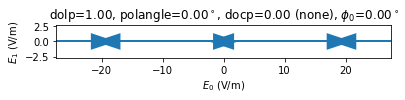

Rayleigh cross-section (10 keV): 1.19623997797 cm²/g (integrated)
Rayleigh cross-section (10 keV): 1.20125707968 cm²/g (tabulated)


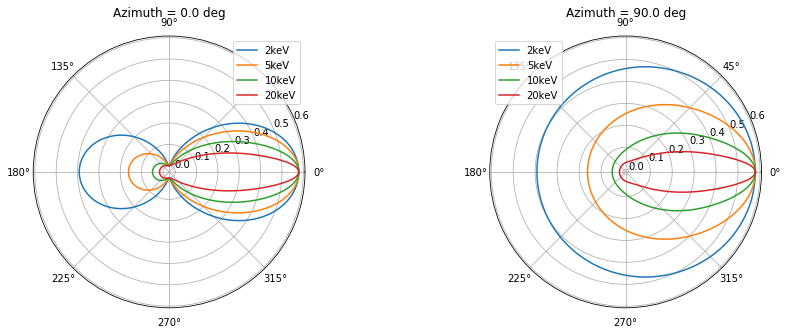

In [7]:
from spectrocrunch.materials import element
from spectrocrunch.sources import xray as xraysources

source = xraysources.factory("synchrotron")
print(source)
if source.stokes.dop!=0:
    print("\nPolarized component:")
    source.stokes.decompose()["pol"].plot_efield()
    plt.show()

el = element.Element("Fe")
polar = np.linspace(0,2*np.pi,500)

fig,axs = plt.subplots(1,2,figsize=(15, 5),subplot_kw={"projection":"polar"})
for ax,azimuth in zip(axs,[0,np.pi/2]):
    plt.sca(ax)
    
    for energy in [2,5,10,20]:
        diffcs = el.diff_rayleigh_cross_section(energy,source)
        r = diffcs(azimuth,polar)
        ax.plot(polar, r, label="{}keV".format(energy))
    ax.set_title("Azimuth = {} deg".format(np.degrees(azimuth)))   
    ax.legend()

energy = 10
diffcs = el.diff_rayleigh_cross_section(energy,source)
integrand = lambda azimuth,polar: diffcs(azimuth,polar)*np.sin(polar)
cs1 = integrate.dblquad(integrand, 0, np.pi, lambda x:0, lambda x:2*np.pi)[0]
cs2 = el.rayleigh_cross_section(energy)
print("Rayleigh cross-section ({} keV): {} cm²/g (integrated)".format(energy,cs1))
print("Rayleigh cross-section ({} keV): {} cm²/g (tabulated)".format(energy,cs2))
  
plt.show()

## Compton scattering

Using the same incident and reference frames as for Thomson scattering, the Stokes parameters are transformed as follows [(McMaster[1961])](https://link.aps.org/doi/10.1103/RevModPhys.33.8)

$$
\begin{equation}
\begin{split}
S_{sc}=&M\cdot S\\
M =& \frac{E_{sc}^2}{E^2}\begin{bmatrix}
a+b&(1-a)\cos2\beta&-(1-a)\sin2\beta&0\\
(1-a)&a\cos2\beta&-a\sin2\beta&0\\
0&\cos\theta\sin2\beta&\cos\theta\cos2\beta&0\\
0&0&0&(b+1)\cos\theta
\end{bmatrix}\\
\beta=&\frac{\pi}{2}-\phi=\arccos(\hat{e}_0\cdot\hat{e}_0^\prime)\\
a=&\frac{1+\cos^2\theta}{2}\\
b=&\frac{E-E_{sc}}{2 m_e c^2}(1-\cos\theta)\\
E_{sc}=&\frac{E}{1+\frac{E}{m_e c^2}(1-\cos\theta)}
\end{split}
\end{equation}
$$

where $E$ and $E_{sc}$ the incident and scattered photon energy. Note that when $E_{sc}=E$ we obtain the same expressions as for Thomson scattering. The scattered intensity can be written as

$$
\begin{equation}
\begin{split}
I_{sc}=&I_0K(\phi,\theta)\\
K(\phi,\theta)=&\frac{E_{sc}^2}{E^2}\left(a+b-(1-a)\left(\frac{S_1}{S_0}\cos2\phi+\frac{S_2}{S_0}\sin2\phi\right)\right)
\end{split}
\end{equation}
$$

Two common examples are $S_1=S_2=S_3=0$ (unpolarized) and $S_1=S_0$, $S_2=S_3=0$ (linear polarized in the horizontal direction)

$$
\begin{equation}
\begin{split}
K_{un}=&\frac{1}{2}\frac{E_{sc}^2}{E^2}\left(\frac{E}{E_{sc}}+\frac{E_{sc}}{E}-\sin^2\theta\right)\\
K_{linh}=&\frac{1}{2}\frac{E_{sc}^2}{E^2}\left(\frac{E}{E_{sc}}+\frac{E_{sc}}{E}-2\sin^2\theta\cos^2\phi\right)
\end{split}
\end{equation}
$$


Incident beam (polarized component):


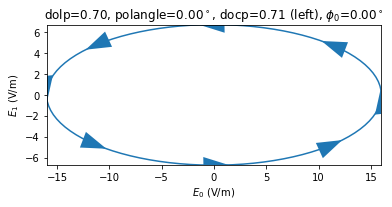

Scattered beam (polarized component in diffraction reference frame):


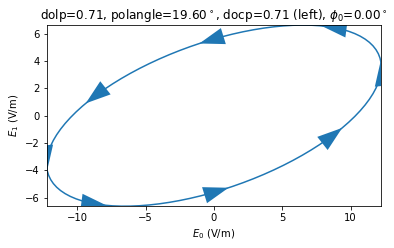

In [8]:
# Define incident intensity and polarization
intensity = 1 # W/m^2
dop = 0.4 # degree of polarization (in [0,1])
dolp = 0.7*dop # degree of linear polarization (in [0,dop])
polangle = 0 # angle of polarization ellipse with respect to the horizontal direction (in [-90,90])
handedness = "left"

# Partially polarized
S1 = polarization.Stokes.from_params(intensity=intensity,dop=dop,dolp=dolp,\
                                    polangle=polangle,handedness=handedness)

# Scattering direction: spherical coordinates
azimuth = 20
polar = 50 # scattering angle
energy = 5

S2 = S1.compton_scattering(azimuth,polar,energy)

# We're looking upstream:
if S1.dop!=0:
    print("\nIncident beam (polarized component):")
    S1.decompose()["pol"].plot_efield()
    plt.show()

if S2.dop!=0:
    print("Scattered beam (polarized component in diffraction reference frame):")
    S2.decompose()["pol"].plot_efield()
    plt.show()


Incident beam (polarized component):


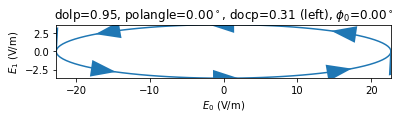

Incident intensity: 1.0 W/m²
Scattered intensity (phi=0deg,theta=90deg) = 0.164316089276 W/m²
Scattered intensity (phi=90deg,theta=90deg) = 0.816490906036 W/m²


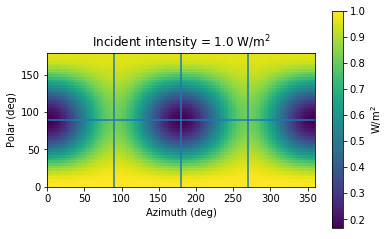

In [9]:
# Define incident intensity and polarization
intensity = 1 # W/m^2
dop = 0.7 # degree of polarization (in [0,1])
dolp = 0.95*dop # degree of linear polarization (in [0,dop])
polangle = 0 # angle of polarization ellipse with respect to the horizontal direction (in [-90,90])
handedness = "left"

S1 = polarization.Stokes.from_params(intensity=intensity,dop=dop,dolp=dolp,\
                                    polangle=polangle,handedness=handedness)

if S1.dop!=0:
    print("\nIncident beam (polarized component):")
    S1.decompose()["pol"].plot_efield()
    plt.show()
    
azimuth = np.linspace(0,360,100)
polar = np.linspace(0,180,50)
extent = [azimuth[0],azimuth[-1],polar[0],polar[-1]]
azimuth,polar = np.meshgrid(azimuth,polar)
energy = 5

print("Incident intensity: {} W/m²".format(S1.intensity))
print("Scattered intensity (phi=0deg,theta=90deg) = {} W/m²".format(S1.compton_intensity(0,90,energy)))
print("Scattered intensity (phi=90deg,theta=90deg) = {} W/m²".format(S1.compton_intensity(90,90,energy)))

img = S1.compton_intensity(azimuth,polar,energy)
plt.imshow(img,origin="lower",extent=extent)
plt.axhline(y=90)
for x in [90,180,270]:
    plt.axvline(x=x)
plt.xlabel("Azimuth (deg)")
plt.ylabel("Polar (deg)")
plt.title("Incident intensity = {} W/m$^2$".format(S1.intensity))
plt.colorbar(label="W/m$^2$")
plt.show()

### Klein-Nishina cross-section

The Klein-Nishina cross-section (inelastic cross-section for a free electron) can be written as

$$
\begin{equation}
\begin{split}
\frac{d\sigma_{KN}}{d\Omega} =& r_e^2\frac{I_{sc}(\phi,\theta)}{I_0}\\
=&r_e^2 K(\phi,\theta)\\
\sigma_{KN} =& r_e^2\int_0^{2\pi}\int_0^\pi K(\phi,\theta) \sin\theta d\theta d\phi\\
=&2\pi r_e^2 \left(
\frac{1+k}{k^2}\left(\frac{2+2k}{c}-\frac{\ln (1+2k)}{k}\right)+\frac{\ln (1+2k)}{2k}-\frac{1+3k}{(1+2k)^2}
\right)\\
k =& \frac{E}{m_e c^2}
\end{split}
\end{equation}
$$

In [10]:
from spectrocrunch.patch.pint import ureg
reload(polarization)

K = S1.compton_K(energy)
integrand = lambda azimuth,polar: K(azimuth,polar)*np.sin(polar)

comptonsc = integrate.dblquad(integrand, 0, np.pi, lambda x:0, lambda x:2*np.pi)[0]

E = ureg.Quantity(energy,"keV").to("m_e*c^2").magnitude

c = 2*E+1
logc = np.log(c)
comptonsc1 = 2*np.pi*((1+E)/E**2*((1+c)/c-logc/E)+logc/(2*E)-(1+3*E)/c**2)

P0 = 2*E**4 + 18*E**3 + 16*E**2 + 4*E
P1 = 4*E**4 - 4*E**3 - 15*E**2 - 10*E - 2
P2 = 4*E**5 + 4*E**4 + E**3
comptonsc2 = np.pi*(P0 + P1*np.log(2*E + 1))/P2

print(comptonsc,comptonsc1,comptonsc2) # units of r_e^2

(8.217704144125136, 8.217704144470986, 8.217704144481456)


### Compton cross-section

The differential Compton cross-section (inelastic scattering cross-section of an atom) is proportional to the differential Klein-Nishina cross-section and the incoherent scattering function

$$
\begin{equation}
\frac{d\mu_C}{d\Omega} = r_e^2 K(\phi,\theta) \frac{N_A}{M}S(E,\theta)
\end{equation}
$$

with SI units $cm^2/g/sr$, $M$ the molar mass of the atom ($g/mol$), $N_A$ the Avogadro constant ($1/mol$) and $S$ the incoherent scattering function of the atom.


XraySource:
 intensity = 1.0 (W/m^2)
 dop = 1.0
 dolp = 1.0
 polangle = 0.0 (deg)
 handedness = none

Polarized component:


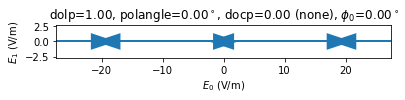

Compton cross-section (10 keV): 0.0859620121855 cm²/g (integrated)
Compton cross-section (10 keV): 0.0854144679284 cm²/g (tabulated)


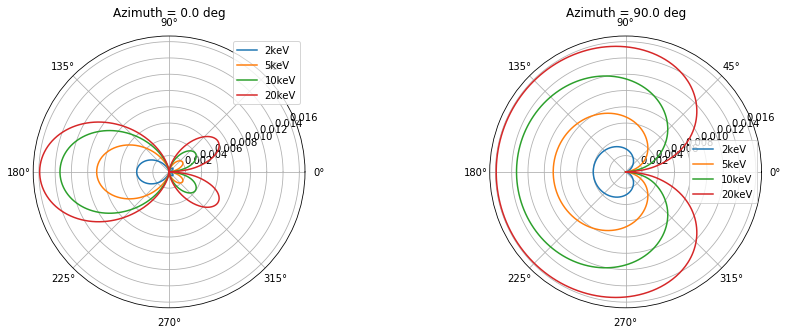

In [11]:
source = xraysources.factory("synchrotron")
print(source)
if source.stokes.dop!=0:
    print("\nPolarized component:")
    source.stokes.decompose()["pol"].plot_efield()
    plt.show()

el = element.Element("Fe")
polar = np.linspace(0,2*np.pi,500)

fig,axs = plt.subplots(1,2,figsize=(15, 5),subplot_kw={"projection":"polar"})
for ax,azimuth in zip(axs,[0,np.pi/2]):
    plt.sca(ax)
    
    for energy in [2,5,10,20]:
        diffcs = el.diff_compton_cross_section(energy,source)
        r = diffcs(azimuth,polar)
        ax.plot(polar, r, label="{}keV".format(energy))
    ax.set_title("Azimuth = {} deg".format(np.degrees(azimuth)))   
    ax.legend()

energy = 10
diffcs = el.diff_compton_cross_section(energy,source)
integrand = lambda azimuth,polar: diffcs(azimuth,polar)*np.sin(polar)
cs1 = integrate.dblquad(integrand, 0, np.pi, lambda x:0, lambda x:2*np.pi)[0]
cs2 = el.compton_cross_section(energy)
print("Compton cross-section ({} keV): {} cm²/g (integrated)".format(energy,cs1))
print("Compton cross-section ({} keV): {} cm²/g (tabulated)".format(energy,cs2))
plt.show()

The abscence of forward scattering can be attributed to the incoherent scattering function.

Compare Rayleigh and Compton differential cross-sections:

XraySource:
 intensity = 1.0 (W/m^2)
 dop = 1.0
 dolp = 1.0
 polangle = 0.0 (deg)
 handedness = none

Polarized component:


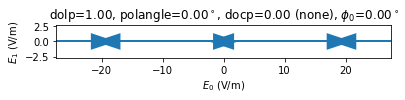

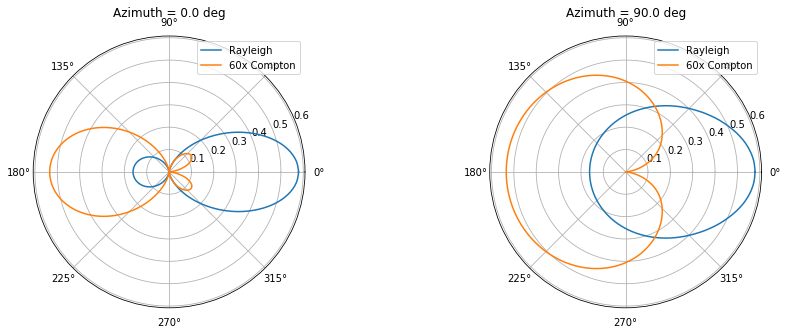

XraySource:
 intensity = 1.0 (W/m^2)
 dop = 0.0
 dolp = 0.0
 polangle = 0.0 (deg)
 handedness = none


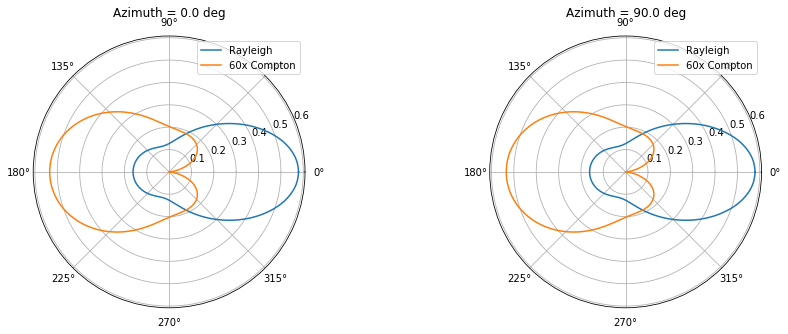

In [17]:
for source in ['synchrotron', 'tube']:
    source = xraysources.factory(source)
    print(source)
    if source.stokes.dop!=0:
        print("\nPolarized component:")
        source.stokes.decompose()["pol"].plot_efield()
        plt.show()

    el = element.Element("Fe")
    polar = np.linspace(0,2*np.pi,500)
    energy = 5

    fig,axs = plt.subplots(1,2,figsize=(15, 5),subplot_kw={"projection":"polar"})
    for ax,azimuth in zip(axs,[0,np.pi/2]):
        plt.sca(ax)

        diffcs = el.diff_rayleigh_cross_section(energy,source)
        rr = diffcs(azimuth,polar)
        ax.plot(polar, rr, label="Rayleigh")
        diffcs = el.diff_compton_cross_section(energy,source)
        rc = diffcs(azimuth,polar)
        m = int(np.round(np.max(rr)/np.max(rc))/10)*10
        ax.plot(polar, rc*m, label="{}x Compton".format(m))

        ax.set_title("Azimuth = {} deg".format(np.degrees(azimuth)))   
        ax.legend()
    plt.show()